In [1]:
import pandas as pd
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Read file into dataframe
df = pd.read_csv('News_2021.csv')
df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id
0,Covid news - live: PM insists booster jabs wil...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Covid news - live: PM insists booster jabs wil...,NaN,10/24/21 7:15,NaN,NaN,google
1,Kolkata Municipal Corporation all set to reope...,https://www.indiatoday.in/cities/kolkata/story...,NaN,NaN,NaN,Kolkata Municipal Corporation all set to reope...,NaN,10/24/21 7:21,The Kolkata Municipal Corporation (KMC) has re...,NaN,indiatoday
2,Leaked memo hints 'immediate' roll-out of Covi...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Leaked memo hints 'immediate' roll-out of Covi...,NaN,10/24/21 7:28,NaN,NaN,google
3,"Assam CM Mocks Akhil Gogoi, Says He Can Only A...",https://www.sentinelassam.com/north-east-india...,"['Breaking News,News,NE News,Assam News,Featur...",['Sentinel Digital Desk'],NaN,Assam CM Himanta Biswa Sarma had taken part in...,Guwahati: Assam CM Himanta Biswa Sarma recentl...,10/24/21 7:28,Guwahati: Assam CM Himanta Biswa Sarma recentl...,https://assets.sentinelassam.com/h-upload/2021...,sentinel
4,Facing alien Isolation,https://www.sentinelassam.com/life/facing-alie...,"['Life,More']",['Sentinel Digital Desk'],NaN,As I reported to one undisclosed location at t...,Kamal Baruah(The writer can be reached at kama...,10/24/21 7:33,Kamal Baruah (The writer can be reached at kam...,https://assets.sentinelassam.com/h-upload/2021...,sentinel
...,...,...,...,...,...,...,...,...,...,...,...
764,"Huge increase in imports checks, consumer conf...",https://www.irishtimes.com/business/huge-incre...,NaN,NaN,NaN,There has been a 20-fold increase in the numbe...,NaN,10/26/21 5:40,There has been a 20-fold increase in the numbe...,https://www.irishtimes.com/polopoly_fs/1.47102...,irishtimes
765,What is the ‚Äòright to disconnect‚Äô? How leg...,https://vancouver.citynews.ca/2021/10/25/canad...,NaN,['Lisa Steacy'],NaN,What if workers had the ‚Äúright to disconnect...,What if workers had the ‚Äúright to disconnect...,10/26/21 5:42,NaN,https://vancouver.citynews.ca/wp-content/blogs...,citynews1130
766,'No Mandate Monday' takes hold at California HS,https://www.foxnews.com/us/no-mandate-monday-t...,NaN,['Edmund DeMarche'],NaN,Some students and teachers in California on Mo...,NaN,10/26/21 5:54,close Video Coronavirus pandemic cost students...,https://static.foxnews.com/foxnews.com/content...,foxnews
767,Antiviral Canadian Medical Products deactivate...,https://www.globenewswire.com/news-release/202...,"['COVID', 'MASK', 'FILTRATION EFFICIENCY', 'an...",['i3 Biomedical Inc.'],NaN,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",NaN,10/26/21 6:00,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",https://ml.globenewswire.com/Resource/Download...,globenewswire


In [3]:
# Fill 'N/A' values with empty spaces so they can be joined without causing an error
df['content'] = df['content'].fillna(' ')
df['description'] = df['description'].fillna(' ')
df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id
0,Covid news - live: PM insists booster jabs wil...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Covid news - live: PM insists booster jabs wil...,,10/24/21 7:15,NaN,NaN,google
1,Kolkata Municipal Corporation all set to reope...,https://www.indiatoday.in/cities/kolkata/story...,NaN,NaN,NaN,Kolkata Municipal Corporation all set to reope...,,10/24/21 7:21,The Kolkata Municipal Corporation (KMC) has re...,NaN,indiatoday
2,Leaked memo hints 'immediate' roll-out of Covi...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Leaked memo hints 'immediate' roll-out of Covi...,,10/24/21 7:28,NaN,NaN,google
3,"Assam CM Mocks Akhil Gogoi, Says He Can Only A...",https://www.sentinelassam.com/north-east-india...,"['Breaking News,News,NE News,Assam News,Featur...",['Sentinel Digital Desk'],NaN,Assam CM Himanta Biswa Sarma had taken part in...,Guwahati: Assam CM Himanta Biswa Sarma recentl...,10/24/21 7:28,Guwahati: Assam CM Himanta Biswa Sarma recentl...,https://assets.sentinelassam.com/h-upload/2021...,sentinel
4,Facing alien Isolation,https://www.sentinelassam.com/life/facing-alie...,"['Life,More']",['Sentinel Digital Desk'],NaN,As I reported to one undisclosed location at t...,Kamal Baruah(The writer can be reached at kama...,10/24/21 7:33,Kamal Baruah (The writer can be reached at kam...,https://assets.sentinelassam.com/h-upload/2021...,sentinel
...,...,...,...,...,...,...,...,...,...,...,...
764,"Huge increase in imports checks, consumer conf...",https://www.irishtimes.com/business/huge-incre...,NaN,NaN,NaN,There has been a 20-fold increase in the numbe...,,10/26/21 5:40,There has been a 20-fold increase in the numbe...,https://www.irishtimes.com/polopoly_fs/1.47102...,irishtimes
765,What is the ‚Äòright to disconnect‚Äô? How leg...,https://vancouver.citynews.ca/2021/10/25/canad...,NaN,['Lisa Steacy'],NaN,What if workers had the ‚Äúright to disconnect...,What if workers had the ‚Äúright to disconnect...,10/26/21 5:42,NaN,https://vancouver.citynews.ca/wp-content/blogs...,citynews1130
766,'No Mandate Monday' takes hold at California HS,https://www.foxnews.com/us/no-mandate-monday-t...,NaN,['Edmund DeMarche'],NaN,Some students and teachers in California on Mo...,,10/26/21 5:54,close Video Coronavirus pandemic cost students...,https://static.foxnews.com/foxnews.com/content...,foxnews
767,Antiviral Canadian Medical Products deactivate...,https://www.globenewswire.com/news-release/202...,"['COVID', 'MASK', 'FILTRATION EFFICIENCY', 'an...",['i3 Biomedical Inc.'],NaN,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",,10/26/21 6:00,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",https://ml.globenewswire.com/Resource/Download...,globenewswire


In [4]:
# Create a new column containing the description and content of each article
df['description&content'] =  df.apply(lambda row: ' '.join((row['description'],row['content'])),axis=1)
df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,description&content
0,Covid news - live: PM insists booster jabs wil...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Covid news - live: PM insists booster jabs wil...,,10/24/21 7:15,NaN,NaN,google,Covid news - live: PM insists booster jabs wil...
1,Kolkata Municipal Corporation all set to reope...,https://www.indiatoday.in/cities/kolkata/story...,NaN,NaN,NaN,Kolkata Municipal Corporation all set to reope...,,10/24/21 7:21,The Kolkata Municipal Corporation (KMC) has re...,NaN,indiatoday,Kolkata Municipal Corporation all set to reope...
2,Leaked memo hints 'immediate' roll-out of Covi...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Leaked memo hints 'immediate' roll-out of Covi...,,10/24/21 7:28,NaN,NaN,google,Leaked memo hints 'immediate' roll-out of Covi...
3,"Assam CM Mocks Akhil Gogoi, Says He Can Only A...",https://www.sentinelassam.com/north-east-india...,"['Breaking News,News,NE News,Assam News,Featur...",['Sentinel Digital Desk'],NaN,Assam CM Himanta Biswa Sarma had taken part in...,Guwahati: Assam CM Himanta Biswa Sarma recentl...,10/24/21 7:28,Guwahati: Assam CM Himanta Biswa Sarma recentl...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,Assam CM Himanta Biswa Sarma had taken part in...
4,Facing alien Isolation,https://www.sentinelassam.com/life/facing-alie...,"['Life,More']",['Sentinel Digital Desk'],NaN,As I reported to one undisclosed location at t...,Kamal Baruah(The writer can be reached at kama...,10/24/21 7:33,Kamal Baruah (The writer can be reached at kam...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,As I reported to one undisclosed location at t...
...,...,...,...,...,...,...,...,...,...,...,...,...
764,"Huge increase in imports checks, consumer conf...",https://www.irishtimes.com/business/huge-incre...,NaN,NaN,NaN,There has been a 20-fold increase in the numbe...,,10/26/21 5:40,There has been a 20-fold increase in the numbe...,https://www.irishtimes.com/polopoly_fs/1.47102...,irishtimes,There has been a 20-fold increase in the numbe...
765,What is the ‚Äòright to disconnect‚Äô? How leg...,https://vancouver.citynews.ca/2021/10/25/canad...,NaN,['Lisa Steacy'],NaN,What if workers had the ‚Äúright to disconnect...,What if workers had the ‚Äúright to disconnect...,10/26/21 5:42,NaN,https://vancouver.citynews.ca/wp-content/blogs...,citynews1130,What if workers had the ‚Äúright to disconnect...
766,'No Mandate Monday' takes hold at California HS,https://www.foxnews.com/us/no-mandate-monday-t...,NaN,['Edmund DeMarche'],NaN,Some students and teachers in California on Mo...,,10/26/21 5:54,close Video Coronavirus pandemic cost students...,https://static.foxnews.com/foxnews.com/content...,foxnews,Some students and teachers in California on Mo...
767,Antiviral Canadian Medical Products deactivate...,https://www.globenewswire.com/news-release/202...,"['COVID', 'MASK', 'FILTRATION EFFICIENCY', 'an...",['i3 Biomedical Inc.'],NaN,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",,10/26/21 6:00,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",https://ml.globenewswire.com/Resource/Download...,globenewswire,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE..."


In [5]:
# Create a function to check whether or not each file is related to Covid 19
def related_to_covid(string):
    covid_words = ['covid', 'vaccine', 'coronavirus', 'vaccination', 'antibody', 'moderna', 'pfizer', 'johnson']
    related = False
    for word in string.strip().split():
        word = word.lower()
        if word in covid_words:
            related = True
    return(related)

In [6]:
# Create a new column to determine if each file is related to Covid 19
df['Related_to_covid'] = df.apply(lambda x: related_to_covid(x['description&content']),axis=1)
df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,description&content,Related_to_covid
0,Covid news - live: PM insists booster jabs wil...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Covid news - live: PM insists booster jabs wil...,,10/24/21 7:15,NaN,NaN,google,Covid news - live: PM insists booster jabs wil...,True
1,Kolkata Municipal Corporation all set to reope...,https://www.indiatoday.in/cities/kolkata/story...,NaN,NaN,NaN,Kolkata Municipal Corporation all set to reope...,,10/24/21 7:21,The Kolkata Municipal Corporation (KMC) has re...,NaN,indiatoday,Kolkata Municipal Corporation all set to reope...,True
2,Leaked memo hints 'immediate' roll-out of Covi...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Leaked memo hints 'immediate' roll-out of Covi...,,10/24/21 7:28,NaN,NaN,google,Leaked memo hints 'immediate' roll-out of Covi...,True
3,"Assam CM Mocks Akhil Gogoi, Says He Can Only A...",https://www.sentinelassam.com/north-east-india...,"['Breaking News,News,NE News,Assam News,Featur...",['Sentinel Digital Desk'],NaN,Assam CM Himanta Biswa Sarma had taken part in...,Guwahati: Assam CM Himanta Biswa Sarma recentl...,10/24/21 7:28,Guwahati: Assam CM Himanta Biswa Sarma recentl...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,Assam CM Himanta Biswa Sarma had taken part in...,False
4,Facing alien Isolation,https://www.sentinelassam.com/life/facing-alie...,"['Life,More']",['Sentinel Digital Desk'],NaN,As I reported to one undisclosed location at t...,Kamal Baruah(The writer can be reached at kama...,10/24/21 7:33,Kamal Baruah (The writer can be reached at kam...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,As I reported to one undisclosed location at t...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,"Huge increase in imports checks, consumer conf...",https://www.irishtimes.com/business/huge-incre...,NaN,NaN,NaN,There has been a 20-fold increase in the numbe...,,10/26/21 5:40,There has been a 20-fold increase in the numbe...,https://www.irishtimes.com/polopoly_fs/1.47102...,irishtimes,There has been a 20-fold increase in the numbe...,True
765,What is the ‚Äòright to disconnect‚Äô? How leg...,https://vancouver.citynews.ca/2021/10/25/canad...,NaN,['Lisa Steacy'],NaN,What if workers had the ‚Äúright to disconnect...,What if workers had the ‚Äúright to disconnect...,10/26/21 5:42,NaN,https://vancouver.citynews.ca/wp-content/blogs...,citynews1130,What if workers had the ‚Äúright to disconnect...,False
766,'No Mandate Monday' takes hold at California HS,https://www.foxnews.com/us/no-mandate-monday-t...,NaN,['Edmund DeMarche'],NaN,Some students and teachers in California on Mo...,,10/26/21 5:54,close Video Coronavirus pandemic cost students...,https://static.foxnews.com/foxnews.com/content...,foxnews,Some students and teachers in California on Mo...,False
767,Antiviral Canadian Medical Products deactivate...,https://www.globenewswire.com/news-release/202...,"['COVID', 'MASK', 'FILTRATION EFFICIENCY', 'an...",['i3 Biomedical Inc.'],NaN,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",,10/26/21 6:00,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",https://ml.globenewswire.com/Resource/Download...,globenewswire,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",False


In [7]:
# Create function to clean the text in a given column

def clean_description(string):
    stopwords_file = open('stopwords_en.txt','r')
    stopwords = []
    # Update the stopword list 
    stopwords.extend(['said','say','says'])
    for word in stopwords_file:
        stopwords.append(word.strip())
    clean_words = []
    # Only append the word to the clean words list if it is alphabetic, not a stopword, and longer than 3 characters
    for word in string.strip().split():
        word = word.lower()
        if word.isalpha() and word not in stopwords and len(word) > 3:
            clean_words.append(word)
    return(clean_words)

In [8]:
# Create a column to hold the cleaned text
df['Cleaned_c&d'] = df.apply(lambda x: clean_description(x['description&content']),axis=1)
df

,title,link,keywords,creator,video_url,description,content,pubDate,full_description,image_url,source_id,description&content,Related_to_covid,Cleaned_c&d
0,Covid news - live: PM insists booster jabs wil...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Covid news - live: PM insists booster jabs wil...,,10/24/21 7:15,NaN,NaN,google,Covid news - live: PM insists booster jabs wil...,True,"[covid, news, insists, booster, jabs, faces, w..."
1,Kolkata Municipal Corporation all set to reope...,https://www.indiatoday.in/cities/kolkata/story...,NaN,NaN,NaN,Kolkata Municipal Corporation all set to reope...,,10/24/21 7:21,The Kolkata Municipal Corporation (KMC) has re...,NaN,indiatoday,Kolkata Municipal Corporation all set to reope...,True,"[kolkata, municipal, corporation, reopen, quar..."
2,Leaked memo hints 'immediate' roll-out of Covi...,https://news.google.com/__i/rss/rd/articles/CB...,NaN,NaN,NaN,Leaked memo hints 'immediate' roll-out of Covi...,,10/24/21 7:28,NaN,NaN,google,Leaked memo hints 'immediate' roll-out of Covi...,True,"[leaked, memo, hints, covid, plan, winter, live]"
3,"Assam CM Mocks Akhil Gogoi, Says He Can Only A...",https://www.sentinelassam.com/north-east-india...,"['Breaking News,News,NE News,Assam News,Featur...",['Sentinel Digital Desk'],NaN,Assam CM Himanta Biswa Sarma had taken part in...,Guwahati: Assam CM Himanta Biswa Sarma recentl...,10/24/21 7:28,Guwahati: Assam CM Himanta Biswa Sarma recentl...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,Assam CM Himanta Biswa Sarma had taken part in...,False,"[assam, himanta, biswa, sarma, taken, campaign..."
4,Facing alien Isolation,https://www.sentinelassam.com/life/facing-alie...,"['Life,More']",['Sentinel Digital Desk'],NaN,As I reported to one undisclosed location at t...,Kamal Baruah(The writer can be reached at kama...,10/24/21 7:33,Kamal Baruah (The writer can be reached at kam...,https://assets.sentinelassam.com/h-upload/2021...,sentinel,As I reported to one undisclosed location at t...,True,"[reported, undisclosed, location, medical, ass..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,"Huge increase in imports checks, consumer conf...",https://www.irishtimes.com/business/huge-incre...,NaN,NaN,NaN,There has been a 20-fold increase in the numbe...,,10/26/21 5:40,There has been a 20-fold increase in the numbe...,https://www.irishtimes.com/polopoly_fs/1.47102...,irishtimes,There has been a 20-fold increase in the numbe...,True,"[increase, number, consignments, food, plant, ..."
765,What is the ‚Äòright to disconnect‚Äô? How leg...,https://vancouver.citynews.ca/2021/10/25/canad...,NaN,['Lisa Steacy'],NaN,What if workers had the ‚Äúright to disconnect...,What if workers had the ‚Äúright to disconnect...,10/26/21 5:42,NaN,https://vancouver.citynews.ca/wp-content/blogs...,citynews1130,What if workers had the ‚Äúright to disconnect...,False,"[workers, enshrined, european, gain, traction,..."
766,'No Mandate Monday' takes hold at California HS,https://www.foxnews.com/us/no-mandate-monday-t...,NaN,['Edmund DeMarche'],NaN,Some students and teachers in California on Mo...,,10/26/21 5:54,close Video Coronavirus pandemic cost students...,https://static.foxnews.com/foxnews.com/content...,foxnews,Some students and teachers in California on Mo...,False,"[students, teachers, california, monday, took,..."
767,Antiviral Canadian Medical Products deactivate...,https://www.globenewswire.com/news-release/202...,"['COVID', 'MASK', 'FILTRATION EFFICIENCY', 'an...",['i3 Biomedical Inc.'],NaN,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",,10/26/21 6:00,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",https://ml.globenewswire.com/Resource/Download...,globenewswire,"MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...",False,"[biomedical, achieves, fastest, efficient, tri..."


In [9]:
# Create a list of all the words in every article
all_words = []
for list in df['Cleaned_c&d']:
    all_words = all_words + list

In [10]:
# Create dataframe to hold only covid articles
covid_df = df[df['Related_to_covid']==True]
covid_words = []
for list in covid_df['Cleaned_c&d']:
    covid_words = covid_words + list

In [11]:
# Create dataframe to hold only non-covid articles
non_covid_df = df[df['Related_to_covid']==False]
non_covid_words = []
for list in non_covid_df['Cleaned_c&d']:
    non_covid_words = non_covid_words + list

In [12]:
highest_frequency = Counter(all_words).most_common(20)
highest_frequency

[('news', 440),
 ('covid', 371),
 ('vaccine', 290),
 ('people', 286),
 ('google', 283),
 ('health', 275),
 ('cases', 273),
 ('coverage', 272),
 ('government', 159),
 ('vaccination', 140),
 ('time', 136),
 ('just', 131),
 ('positive', 129),
 ('sheeran', 124),
 ('workers', 116),
 ('year', 115),
 ('need', 114),
 ('live', 112),
 ('like', 111),
 ('pandemic', 111)]

In [13]:
freq_dict = dict(highest_frequency)

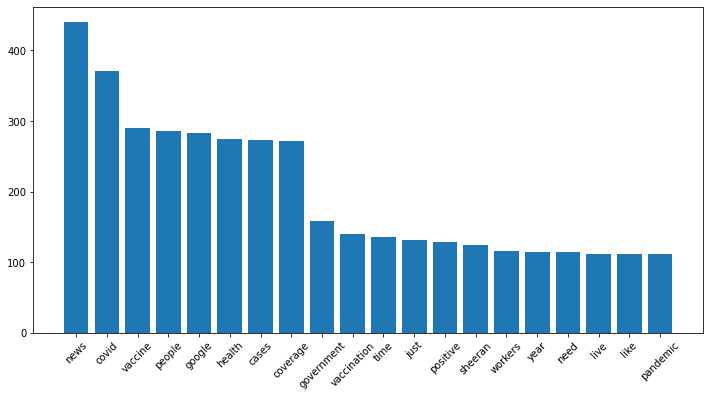

In [17]:
fig = plt.figure(figsize=(12,6))
plt.bar(x=freq_dict.keys(), height=freq_dict.values())
plt.xticks(rotation=45)
plt.show()

In [168]:
pcntg_related_to_covid = len(df[df['Related_to_covid']==True])/len(df['Related_to_covid'])*100
print(f'Percent of articles relate to COVID-19: {pcntg_related_to_covid:.2f}%')

Percent of articles relate to COVID-19: 54.23%


In [149]:
def calculate_sentiment(word_list):
    # Calculate the sentiment using vader library
    analyzer = SentimentIntensityAnalyzer()

    # vader needs strings as input. Transforming the list into string
    clean_text_str = ' '.join(word_list)
    vad_sentiment = analyzer.polarity_scores(clean_text_str)

    pos = vad_sentiment ['pos'] * 100
    neg = vad_sentiment ['neg'] * 100
    neu = vad_sentiment ['neu'] * 100

    print ('\nThe following is the distribution of the sentiment for the file -')
    print (f'\n--- It is positive for {pos:.1f}%')
    print (f'\n--- It is negative for {neg:.1f}%')
    print (f'\n--- It is neutral for {neu:.1f}%', '\n')

In [150]:
calculate_sentiment(all_words)


The following is the distribution of the sentiment for the file -

--- It is positive for 16.4%

--- It is negative for 8.3%

--- It is neutral for 75.3% 



In [151]:
calculate_sentiment(covid_words)


The following is the distribution of the sentiment for the file -

--- It is positive for 15.5%

--- It is negative for 8.5%

--- It is neutral for 76.1% 



In [152]:
def make_wordcloud(wordlist):
    # Define the wordcloud parameters for the file
    wc = WordCloud(background_color = 'white', max_words=2000)

    # Generate word cloud for pros file
    wc.generate(' '.join(wordlist))

    # storing to file
    wc.to_file('pros.png')

    # Show the cloud
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

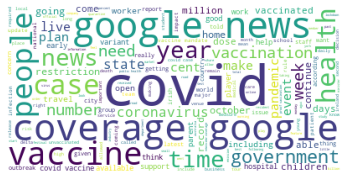

In [169]:
make_wordcloud(covid_words)

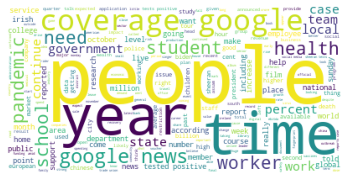

In [170]:
make_wordcloud(non_covid_words)